In [47]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [70]:
class Perceptron():
  def __init__(self,w0=1,w1=0.1,w2=0.1):
    self.w0 = w0
    self.w1 = w1
    self.w2 = w2
  
  def w_sum(self,x1,x2):
    return x1*self.w1 + x2*self.w2 + 1*self.w0
  
  def step_function(self,z):
    if(z>=0):
      return 1
    else:
      return 0
  
  def predict(self,x1,x2):
    z = self.w_sum(x1,x2)
    return self.step_function(z)

  def predict_boundary(self, x):
    return -(self.w1 * x + self.w0) / self.w2

  def fit(self, X, y, epochs=1, step=0.1, verbose=True):
    errors = []
    for epoch in range(epochs):
      error = 0
      for i in range(len(X)):
        x1, x2, target = X[i][0], X[i][1], y[i]
        update = step * (target - self.predict(x1,x2))
        self.w1 += update*x1
        self.w2 += update*x2
        self.w0 += update
        error += int(update != 0.0)
      errors.append(error)
      if verbose:
        print("Epochs: {} - Error: {} - Errors from all epochs {}".format(epoch, error, errors))

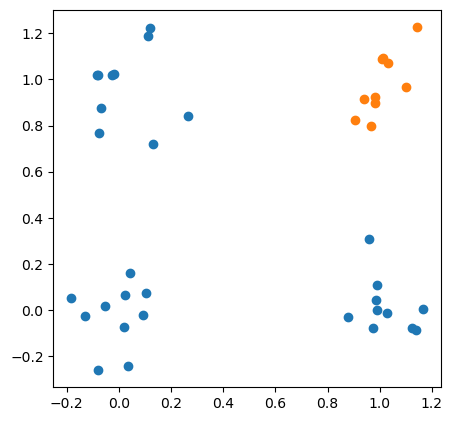

In [71]:
centers = [[0,0],[0,1],[1,0],[1,1]]
X, y = make_blobs(40,2,centers = centers,cluster_std=0.1)
y = np.array([1 if old == 3 else 0 for old in y])

fig, ax = plt.subplots(figsize = (5,5), dpi=100)

for i in np.unique(y):
  ds = X[y == i]
  plt.scatter(ds.T[0],ds.T[1])

In [72]:
neuron = Perceptron()
neuron.fit(X,y, epochs=5)

Epochs: 0 - Error: 26 - Errors from all epochs [26]
Epochs: 1 - Error: 0 - Errors from all epochs [26, 0]
Epochs: 2 - Error: 0 - Errors from all epochs [26, 0, 0]
Epochs: 3 - Error: 0 - Errors from all epochs [26, 0, 0, 0]
Epochs: 4 - Error: 0 - Errors from all epochs [26, 0, 0, 0, 0]


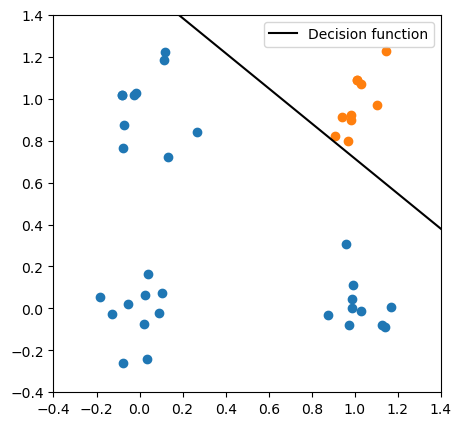

In [73]:
fig, ax = plt.subplots(figsize = (5,5), dpi=100)
for i in np.unique(y):
  ds = X[y == i]
  ax.scatter(ds.T[0],ds.T[1])

dom = np.linspace(-0.5,1.5,11)
ax.plot(dom, neuron.predict_boundary(dom), "k", label="Decision function")

ax.set_ylim(-0.4,1.4)
ax.set_xlim(-0.4,1.4)
ax.legend()